In [15]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

## Структура семинара:

1. Параметрическое оценивание (на примере функции оценки максимального правдоподобия)
2. Дельта-метод
3. Информация Фишера

# 1. Параметрическое оцениваение

Нам нужно оценить какой-либо параметр из модели. Как правило, мы выбираем модель - скажем, линейную регрессию - и используем наблюдаемые данные $X$ для создания параметров модели $\theta$.

Например, если мы отбираем случайную переменную $\theta$, которую, как предполагается, обычно распределяем на некоторые средние $\mu$ и $\sigma$. Наша цель - найти оценки $\mu$ и $\sigma$ из нашего сэмпла, которые точно представляют истинный $\theta$, а не только образцы, которые мы вытащили.

Рассмотрим, когда вы делаете линейную регрессию, и ваша модель оценивает коэффициенты для $\mu$ на зависимой переменной $y$. Как мы можем максимизировать вероятность нашей оценки $\theta$ от истинного $X$? 

Функция плотности вероятности нормального распределения:
![norm](https://cdn-images-1.medium.com/max/1200/1*P78bMZPhhKnzLkwcNgeJ0g.png)

Это уравнение говорит нам о вероятности, что $x$ сэмплирован из $p$, когда истинными параметрами распределения являются $\mu$ и $\sigma$.

Предположим, что наш образец равен $3$, какова вероятность того, что это произойдет из распределения $\mu=3$ и $\sigma=1$?

In [16]:
norm.pdf?

In [17]:
# распределения  μ=3  и  σ=1
norm.pdf(3,3,1)

0.3989422804014327

In [18]:
# проверить распределение с μ = 7 и σ = 2
norm.pdf(3,7,2)

0.02699548325659403

Предположим, что у нас есть набор сэмплов $X$, которые происходят из некоторого нормального распределения, и все они взаимно независимы друг от друга. 

В таком случае, вероятность наблюдения такого набора сэмплов равна произведению вероятностей получить каждый из сэмплов. Это называется **правдоподобием выборки**.

Вероятность выбора 2 и 6 из распределения с $\mu=4$ и $\sigma=1$:

In [19]:
norm.pdf(2,4,1)*norm.pdf(6,4,1)

0.0029150244650281948

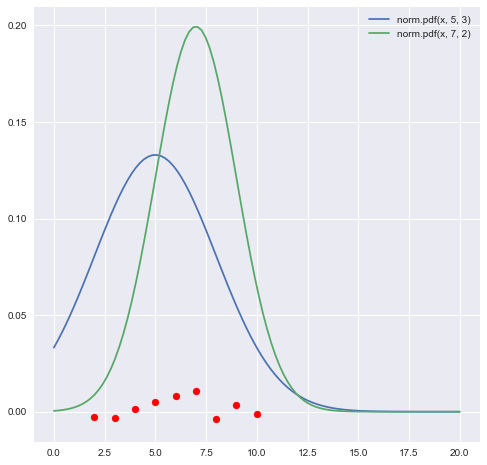

In [20]:
sample = np.linspace(2,10,9)# [ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]
x=np.linspace(0,20,100)
y=norm.pdf(x, 5, 3)
y1=norm.pdf(x, 7, 2)

sns.set()
plt.figure(figsize=(8,8))
plt.plot(x,y)
plt.plot(x,y1)
plt.scatter(sample, np.random.randn(len(sample)) / 200, c='r')
plt.legend(['norm.pdf(x, 5, 3)','norm.pdf(x, 7, 2)'], loc='upper right')

# 1. Maximum Likelihood Estimation (MLE)

Итак, мы хотим найти $p(4, 5, 7, 8, 8, 9, 10, 5, 2, 3, 5, 4, 8, 9; \mu, \sigma)$. Вероятность оценивается по нормальному распределению с $\mu$ и $\sigma$. Но так как мы не знаем $\mu$ и $\sigma$, то нам необходимо оценить их.

Мы делаем это с помощью оценки максимального правдоподобия (MLE). MLE основывается на максимизации вероятности пронаблюдать выборку.

Наше $\theta$ является параметром, который оценивает $x = [4, 5, 7, 8, 8, 9, 10, 5, 2, 3, 5, 4, 8, 9]$, который, как мы предполагаем, исходит из нормального распределения PDF, показанного ниже.

Мы хотим максимизировать вероятность того, что наш параметр $\theta$ относится к нормальному распределению. 

Уравнение правдоподобия чаще всего записывается с использованием логарифма вероятности, так как в этом случае произведение переходит в сумму, что сильно упрощает жизнь.

Log Likelihood Equation:
    
![LLE](https://cdn-images-1.medium.com/max/1200/1*H4hW2Haijx9lMdIQJWP32w.png)

In [21]:
np.std(sample), np.mean(sample) # mean and std from sample

(2.581988897471611, 6.0)

In [23]:
# Compare the likelihood of the random samples to the two distributions
def compare_data_to_dist(x, mu_1=5, mu_2=7, sd_1=3, sd_2=2):
    ll_1 = 0
    ll_2 = 0
    for i in x:
        ll_1 += np.log(norm.pdf(i,mu_1,sd_1)) #log likelihood for mu_1, sd_1
        ll_2 += np.log(norm.pdf(i,mu_2,sd_2)) #log likelihood for mu_2, sd_2
    
    print ("The LL of of x for mu = %d and sd = %d is: %.4f" % (mu_1, sd_1, ll_1))
    print ("The LL of of x for mu = %d and sd = %d is: %.4f" % (mu_2, sd_2, ll_2))
compare_data_to_dist(sample)

The LL of of x for mu = 5 and sd = 3 is: -21.9913
The LL of of x for mu = 7 and sd = 2 is: -23.1338


Мы хотим построить логарифмическую вероятность для возможных значений $\mu$ и $\sigma$. Ниже мы зафиксировали $\sigma = 3$, а наше предположение для $\mu \in \{ \mu \in R | 0 \leq x \leq 20 \}$. Построим же зависимость $L$ от $\mu$.

Мы можем видеть, что максимум нашей функции правдоподобия встречается вокруг значения [6.2]. Наша цель - найти значения $\mu$ и $\sigma$, которые максимизируют функцию правдоподобия.

Text(0,0.5,'Log Likelihood')

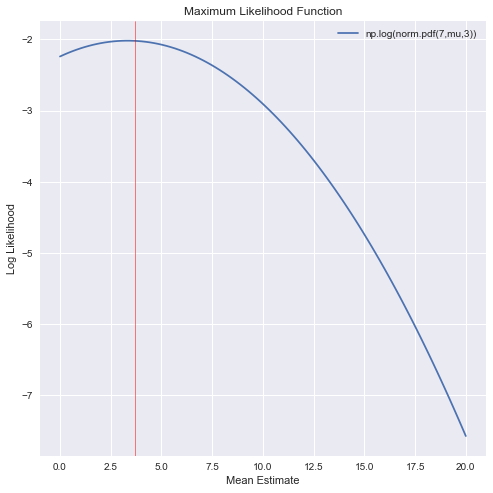

In [24]:
mu=np.linspace(0,20,100)
x=np.linspace(2,10,100)
y=norm.pdf(x,mu,3)# sd fixed on 3
plt.figure(figsize=(8,8))
plt.plot(mu,np.log(y))
plt.legend(['np.log(norm.pdf(7,mu,3))'],loc='upper right')
plt.axvline(x=3.7,linewidth=0.5, color='r')
plt.title("Maximum Likelihood Function")
plt.xlabel("Mean Estimate")
plt.ylabel("Log Likelihood")

Найдём $\theta_\mu$ и $\theta_\sigma$ для нормального распределения из максимума правдоподобия.

Чтобы максимизировать наше уравнение по каждому из наших параметров, нам нужно взять производную и приравнять к 0.

Сначала давайте оценим $\theta_\mu$ из нашего уравнения правдоподобия, приведенного выше:

$$\frac{\delta L}{\delta \mu} = 0 \Rightarrow \theta_\mu = \frac{\sum x_i}{n}$$

$$\frac{\delta L}{\delta \sigma} = 0 \Rightarrow \theta_\sigma = \frac{\sum (x_i - \theta_\mu)^2}{n}$$

The max LL for sd 0.50 is -122.03
The max LL for sd 1.00 is -38.27
The max LL for sd 1.50 is -25.25
The max LL for sd 2.50 is -21.32
The max LL for sd 3.00 is -21.49
The max LL for sd 3.50 is -21.99


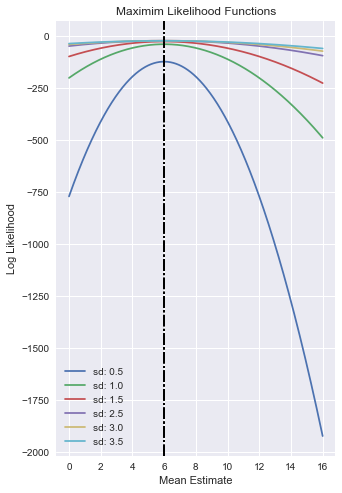

In [25]:
# Plot the Maximum Likelihood Functions for different values of mu and sigma
def plot_ll(x):
    plt.figure(figsize=(5,8))
    plt.title("Maximim Likelihood Functions")
    plt.xlabel("Mean Estimate")
    plt.ylabel("Log Likelihood")
    mu_set = np.linspace(0, 16, 1000)
    sd_set = [.5, 1, 1.5, 2.5, 3, 3.5]
    max_val = max_val_location = None
    
    for i in sd_set:
        
        ll_array = []
        
        for j in mu_set:
            temp_mm = 0
            
            for k in x:
                
                temp_mm += np.log(norm.pdf(k,j,i))# The LL function
            ll_array.append(temp_mm)
        
            if (max_val is None):# what do you expect from it to be plotted?
                max_val = max(ll_array)
                
            elif max(ll_array) > max_val:
                max_val = max(ll_array)
                max_val_location = j
        
        # Plot the results
        plt.plot(mu_set, ll_array, label="sd: %.1f" % i)    
        print ("The max LL for sd %.2f is %.2f" % (i, max(ll_array)))
        plt.axvline(x=max_val_location, color='black', ls='-.')
        plt.legend(loc='lower left')

x=np.linspace(2,10,9)
plot_ll(x)

Очевидно, что максимальное значение функции правдоподобия реализуется при $\theta_\sigma \approx 2.5$.
![Очевидно](http://zloy-tony.ru/wp-content/uploads/2017/03/2C09FFeJO4o.jpg)

Каждая строка строит зависимость максимума правдоподобия от $\mu$ при некотором фиксированном $\theta_\sigma$. Максимум каждой кривой близок к $6.2$. Теперь не сложно увидеть, что максимальное значение функции правдоподобия реализуется при $\theta_\sigma \approx 2.5$.

Проверяем для оценки среднего:

$$θ_{\mu} = \frac{\sum x_i}{n} = (2 + 3 + 4 + 5 + 6 + 7 + 8 + 9 + 10) / 9 = 6$$

Для оценки дисперсии:

$$θ_{\sigma} = \frac{\sum (x_i - \theta_\mu)^2}{n} = \frac{\sum (x_i - 6)^2}{n} = 2.582$$


In [26]:
# И вот ещё раз с помощью стандартных функций :)
print(np.mean(x))
print(np.std(x))

6.0
2.581988897471611


Теперь, когда у нас есть оценки для $\mu$ и $\sigma$  - красный цвет на графике - и посмотрите, как она складывается с потенциальными распределениями, на которые мы смотрели раньше.

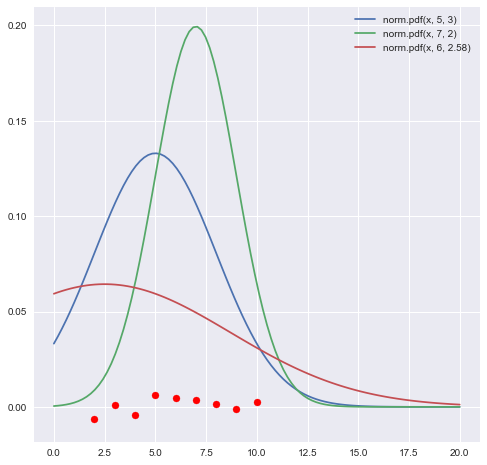

In [27]:
sample = np.linspace(2,10,9)
x=np.linspace(0,20,100)
y=norm.pdf(x, 5, 3)
y1=norm.pdf(x, 7, 2)
y_estimated= norm.pdf(x,2.5,6.2)
plt.figure(figsize=(8,8))
plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y_estimated)
plt.scatter(sample, np.random.randn(len(sample)) / 200, c='r')
plt.legend(['norm.pdf(x, 5, 3)','norm.pdf(x, 7, 2)','norm.pdf(x, 6, 2.58)'],loc='upper right')

## 1.2 MAP a.k.a. Maximum a posteriori

Предположим, что вы подбросили моменту один раз и у вас выпал орёл. 

Распределение описывается распредлением Бернулли: $p(x=1, q) = q$.

Для выборки $x_1, x_2, \dots, x_N$ правдоподобие записывается следующим образом:

$$p(X, q) = \prod q^{x_i} (1 - q)^{1-x_i}$$

$$\log p(X, q) = \sum\left[ x_i \log q + (1 - x_i) \log( - q) \right]$$

$$\frac{\delta }{\delta q} \log p(X, q) = \frac{1}{q} \sum x_i - \frac{1}{1-q} \sum (1 - x_i) = 0$$

Получаем:

$$q = \frac{\sum x_i}{n}$$

В согласии с методом максимума правдоподобия следует, что $p=1$, т.е. следует что монетка всегда будет выпадать орлом.

Такая оценка не очень хорошо согласуется с реальностью. 

Однако у вас есть некоторое априорное знание. Вы точно знаете, что честная монетка выпадает орлом в 50% случаев.

Можем ли мы как-то это использовать? Да, это обеспечивается введением априорного распределения.

В MLE оценка параметров выглядела так:

$$\theta = \mathrm{argmax} \log P(X | \theta) = \mathrm{argmax} \sum \log p(x_i, \theta) $$


В MAP мы говорим, что есть ещё распределение $P(\theta)$, которое появляется из некоторых наших знаний о мире. Тогда MAP записывается следующим образом:

$$
\theta = \mathrm{argmax}  P(X | \theta) P(\theta) = \mathrm{argmax} \left( \sum  \log p(x_i, \theta) \right) P(\theta)
$$

Вернёмся к монете.

Априорное распределени моделируется бета-распределением у которого плотность выглядит так:

![betapdf](https://wikimedia.org/api/rest_v1/media/math/render/svg/125fdaa41844a8703d1a8610ac00fbf3edacc8e7)

![beta](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Beta_distribution_pdf.svg/531px-Beta_distribution_pdf.svg.png)

В таком случае:

$$p(X, q) p(q) = \prod q^{x_i} (1 - q)^{1-x_i} \frac{1}{B(\alpha, \beta)} q^{\alpha - 1} (1 - q)^{\beta - 1}$$

Лог-вероятность:

$$\log p(X, q) p(q) = (\alpha - 1) \log q + (\beta - 1) \log (1 - q) +  \sum\left[ x_i \log q + (1 - x_i) \log( - q) \right] $$

Производная:


$$\frac{\delta }{\delta q} \log p(X, q) p(q) = $$

$$ = \frac{1}{q} \sum x_i - \frac{1}{1-q} \sum (1 - x_i) + \frac{\alpha - 1}{q} - \frac{\beta - 1}{1 - q} = 0$$

Решая уравнение выше получаем:

$$\mu = \frac{\sum x_i + \alpha - 1}{n + \beta + \alpha - 2}$$


Пусть наш приор $\alpha=\beta=2$(см. картинку выше).

Тогда при одном броске монеты получаем следующую оценку:

$$q = \frac{1 + 2 - 1}{1 + 2 + 2 - 2} = \frac{2}{3} \approx 0.66$$

А теперь без вывода посмотрим что получится, если тоже самое применить к нормальному распределению на примере из прошлой части. Наш приор, что $\mu \sim N(0, 1) = N(\mu_0, \sigma_\mu)$.

The max LL for sd 0.50 is -140.47
The max LL for sd 1.00 is -55.39
The max LL for sd 1.50 is -40.57
The max LL for sd 2.50 is -32.86
The max LL for sd 3.00 is -31.41
The max LL for sd 3.50 is -30.54
The max LL for sd 4.00 is -30.02
The max LL for sd 4.50 is -29.75


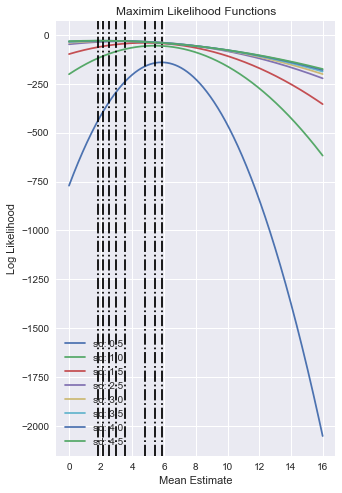

In [28]:
# Plot the Maximum Likelihood Functions for different values of mu and sigma
def plot_ll(x):
    plt.figure(figsize=(5,8))
    plt.title("Maximim Likelihood Functions")
    plt.xlabel("Mean Estimate")
    plt.ylabel("Log Likelihood")
    mu_set = np.linspace(0, 16, 1000)
    sd_set = [.5, 1, 1.5, 2.5, 3, 3.5, 4, 4.5]
    max_val = max_val_location = None
    # для 
    for i in sd_set:
        ll_array = []
        # для 
        for j in mu_set:
            temp_mm = 0
            # для измерений
            for k in x:
                temp_mm += np.log(norm.pdf(k, j, i)) # The LL function
            ll_array.append(temp_mm + np.log(norm.pdf(j, 0, 1)))
        
            if (max_val is None):
                max_val = max(ll_array)
            elif max(ll_array) > max_val:
                max_val = max(ll_array)
                max_val_location = j
        
        # Plot the results
        plt.plot(mu_set, ll_array, label="sd: %.1f" % i)    
        print ("The max LL for sd %.2f is %.2f" % (i, max(ll_array)))
        plt.axvline(x=max_val_location, color='black', ls='-.')
        plt.legend(loc='lower left')

x=np.linspace(2,10,9)
plot_ll(x)

In [30]:
(54.)/(9. + 3.5**2)

2.541176470588235

Как видно, теперь $\mu$ стало смещенно к 0, что и ожидалось.

MAP-оценка выглядит следующим образом:

$$
\mu = \frac{\sigma_{\mu}^2 \cdot \left(\sum x_i\right) + \sigma^2 \mu_0 }{\sigma_{\mu}^2 n + \sigma^2} = \frac{1 \cdot 54 + 0}{9 + 3.5^2} = 2.54
$$

# 2. Дельта-метод

##### 1. Источник Casella berger стр 523, пример 10.17
https://fsalamri.files.wordpress.com/2015/02/casella_berger_statistical_inference1.pdf

Efron (1982) исследовал результаты здачи двух экзаменов LSAT(law school admission test) и GPA (grade point average). Для 15 юридических школ он получил средние значения.

1. Посчитайте корреляцию LSAT и GPA
2. Используя непараметрический бутстрап, оцените стандартное отклонение коэффициента корелляции. Используйте B=1000 ресамплов, нарисуйте гистограмму.
3. Используйте параметрический бутстрап для оценки коэффициента корелляции. Считая что обе метрики (LSAT, GPA) представляют двумерное нормальное распределение.  Используйте B=1000 ресамплов.
4. Если *(Х,Y)* двумерное нормальное распределение с коэффициетом корелляции *p* и где *r* - коэффициент корреляции сэмпла, тогда Дельта Метод может быть использован, для того, чтобы показать:

    $$ \sqrt{n}(r-p) \rightarrow N\left(0, (1-p^2 )^2\right)$$
    
Сравните результаты с результатами бутстреп.

In [31]:
lsat=[576,580,653,635,555,575,558,661,545,578,651,572,666,605,594]
gpa=[3.39,3.07,3.12,3.30,3.00,2.74,2.81,3.43,2.76,3.03,3.36,2.88,3.44,3.13,2.96]

#### 1. Посчитайте корреляцию LSAT и GPA

In [32]:
from scipy.stats import pearsonr
pearsonr?

In [33]:
# искомые корреляции
pearsonr(lsat,gpa)

(0.7763744912894072, 0.0006651020111028131)

In [34]:
# склеим лист чтобы выбирать через индексы
corrs=np.column_stack((lsat,gpa))

In [35]:
corrs

array([[576.  ,   3.39],
       [580.  ,   3.07],
       [653.  ,   3.12],
       [635.  ,   3.3 ],
       [555.  ,   3.  ],
       [575.  ,   2.74],
       [558.  ,   2.81],
       [661.  ,   3.43],
       [545.  ,   2.76],
       [578.  ,   3.03],
       [651.  ,   3.36],
       [572.  ,   2.88],
       [666.  ,   3.44],
       [605.  ,   3.13],
       [594.  ,   2.96]])

In [36]:
# корреляции через лист
pearsonr(corrs[:,0],corrs[:,1])

(0.7763744912894072, 0.0006651020111028131)

#### 2.  Используйте параметрический бутстрап для оценки коэффициента корелляции. Считая что обе метрики (LSAT, GPA) представляют двумерное нормальное распределение.  Используйте B=1000 ресамплов.

In [38]:
np.random.choice?

In [39]:
# configure bootstrap
n_iterations = 1000
n_size = 15
idx=np.arange(0,15)
xb = np.random.choice(idx, (n_size, n_iterations), replace=True) # бутстрепная выборка индексов из листа оценок
#np.shape(xb)

In [41]:
xb.shape

(15, 1000)

In [43]:
i=0
xb[:,i]

array([ 0, 10,  8, 12, 10, 13,  8,  1,  5,  7,  8,  3,  1, 13, 10])

In [48]:
np.percentile?

СТД 0.394714508328336 0.39167610371781203
Интервал 95% [0.47145239 0.96030615]


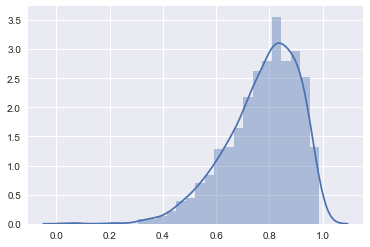

In [50]:
pcorrs=np.zeros((2,n_iterations))

for i in range(0,n_iterations):
    pcorrs[:,i]=pearsonr(corrs[xb[:,i]][:,0],corrs[xb[:,i]][:,1])
print ('СТД', np.std(pcorrs), np.mean(pcorrs))     
print ('Интервал 95%', np.percentile(pcorrs[0],[2.5,97.5] ))    

sns.distplot(pcorrs[0])

#### 3. Используйте параметрический бутстрап для оценки коэффициента корелляции. Считая что обе метрики (LSAT, GPA) представляют двумерное нормальное распределение.  Используйте B=1000 ресамплов.

In [51]:
np.random.norma

СТД 0.1269133790261278


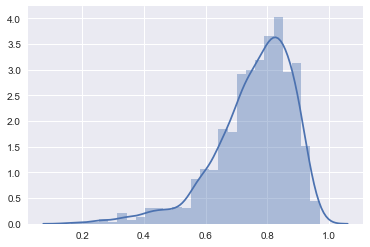

In [52]:
mx=np.mean(lsat)
my=np.mean(gpa)
sdx=np.std(lsat)
sdy=np.std(gpa)
rho=pearsonr(lsat, gpa)[0]
b=rho*sdx/sdy
sdxy=np.sqrt(1-rho*rho)*sdx
rhodata=np.zeros(1000)
rhodata[0]=rho
for j in range(1,1000):
    y=np.random.normal(my, sdy, 15)
    x=np.random.normal(mx +b*(y-my),sdxy,15)
    rhodata[j]=pearsonr(x,y)[0]

print('СТД', np.std(rhodata))
sns.distplot(rhodata)

#### 4. Если *(Х,Y)* двумерное нормальное распределение с коэффициетом корелляции *p* и *r* корелляция сэмпла, тогда Дельта Метод может быть использован, для того, чтобы показать:   
$$ \sqrt{n}(r-\rho) \rightarrow N\left(0, (1-\rho^2 )^2\right)$$

Аппроксимация Дельта Метода:
    $$ r \sim n\left(\rho, (1-\rho^2 )^2\right/n)$$
    
Тогда рассчет стандартной ошибки:


Тогда рассчет стандартной ошибки:
$$ \sqrt{(1-0.776^2)^2/15)} =0.102$$

# 3. Информация Фишера

Информацию Фишера можно использовать для расчёта ошибок в оценке параметров и корреляций ошибок(?). 

Это делается из [неравенства Крамера-Рао](https://ru.wikipedia.org/wiki/%D0%9D%D0%B5%D1%80%D0%B0%D0%B2%D0%B5%D0%BD%D1%81%D1%82%D0%B2%D0%BE_%D0%9A%D1%80%D0%B0%D0%BC%D0%B5%D1%80%D0%B0_%E2%80%94_%D0%A0%D0%B0%D0%BE), которое утверждает, что снизу дисперсия параметра ограничена диагональным членом матрицы обратной к матрице Фишера.

Посмотрим на оценку дисперсии параметров некоторого периодичного сигнала.

In [54]:
from scipy.misc import derivative
from scipy.optimize import curve_fit
import inspect
import matplotlib.pyplot as plt
import numpy as np

В качестве сигнала мы возьмём синус со следующими параметрами: амплитуда 2, частота 8 и фаза 0.

Text(0.5,0,'time (s)')

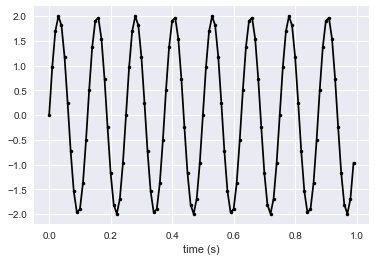

In [55]:
def signal(t, a, f, ph):
    return a * np.sin(2 * np.pi * f * t + ph)

parameters = {

  'a':2,
  'f':8,
  'ph':0
}

noise = 0.1 # добавленный шум

T = np.arange(0, 1, 0.01)
plt.plot(T, signal(T, **parameters), '.-k')
plt.xlabel('time (s)')

Чтобы посчитать границу неравенства Крамера-Рао нужно взять обратную от матрицы Фишера. В предположении что каждое измерение имеет нормальную ошибку и измерения независимы друг от друга посчитать матрицу Фишера достаточно просто.

Предположим, что измерения имеют нормальное распределение и одинаковую дисперсию $\sigma^2$, тогда матрица Фишера считается так:

$$\mathcal{I}_{mn} = \frac{1}{\sigma^2} \frac{\partial x^\mathrm{T}}{\partial \theta_m} \frac{\partial x}{\partial \theta_n} = \frac{1}{\sigma^2} \sum_k \frac{\partial x_k}{\partial \theta_m} \frac{\partial x_k}{\partial \theta_n}$$

где $\theta$ это вектор параметров, т.е. [амлпитуда, частота, фаза], а $x_k$ -- функция сигнала(т.е. $x(t, a, \omega, \phi) = a \sin(\omega t + \phi)$).

Переопределим: $D_{ik} := \frac{\partial x_k}{\partial \theta_i}$, тогда:

$$\mathcal{I}_{mn} = \frac{1}{\sigma^2} \sum_k \frac{\partial x_k}{\partial \theta_m} \frac{\partial x_k}{\partial \theta_n} = \frac{1}{\sigma^2} \sum_k D_{mk} D_{nk}$$

In [56]:
{**parameters, **{'a': 5}}

{'a': 5, 'f': 8, 'ph': 0}

In [58]:
D = np.zeros((len(parameters), len(T)))

# для каждого параметра
for i, argname in enumerate(parameters.keys()):
    # для каждого измерения
    for k, t in enumerate(T):
        # определим функцию по которой будем считать производную
        func = lambda x: signal(t, **{**parameters, **{argname: x}})
        
        # посчитаем производную
        D[i,k] = derivative(func, parameters[argname],dx=.0001) # dx=0.0001

In [59]:
D.shape

(3, 100)

Text(0.5,0,'time (s)')

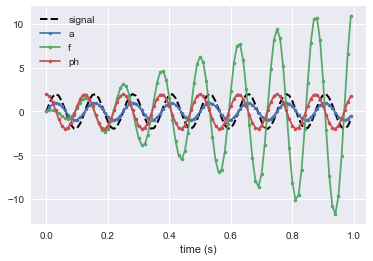

In [60]:
plt.plot(T, signal(T, **parameters), '--k', lw=2, label='signal')

for Di, argname in zip(D, parameters.keys()):
    plt.plot(T, Di, '.-', label=argname)
    
plt.legend(loc='best')
plt.xlabel('time (s)')

Матрица $D_{ik}$ показывает как сильно $k$-ое измерение влияет на $i$-ый параметр. К примеру, видно, что на параметр амплитуды сильнее всего влияют значения в пиках синуса. 

Кроме того, последние точки оказываются более чувствительными к частоте. 

А теперь посчитаем матрицу Фишера по матрице $D$:
$$\mathcal{I}_{m,n}= \frac{1}{\sigma^2} \sum_k D_{mk} D_{nk}$$

Посчитаем это с помощью функции из numpy: [```einsum```](http://docs.scipy.org/doc/numpy/reference/generated/numpy.einsum.html)

In [61]:
np.einsum?

In [69]:
I = np.einsum('ik,jk',D,D) # реализуем формулу выше по операндам ik,jk
print(I)

[[ 5.00000000e+01 -5.71453545e+00 -1.56329358e-11]
 [-5.71453545e+00  2.55477009e+03  6.15752139e+02]
 [-1.56329358e-11  6.15752139e+02  1.99999999e+02]]


In [65]:
np.einsum('ik,jk->k',D,D) = = np.einsum('ij,kj',D,D)

C:\Users\kondr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

In [70]:
np.einsum('ij,kj',D,D)/noise**2

array([[ 5.00000000e+03, -5.71453545e+02, -1.56329358e-09],
       [-5.71453545e+02,  2.55477009e+05,  6.15752139e+04],
       [-1.56329358e-09,  6.15752139e+04,  1.99999999e+04]])

In [67]:
np.einsum?

Граница Крамера-Рау лежит на диагонали обратной матриц от матрицы $\mathcal{I}$:

In [72]:
I_inv = np.linalg.inv(I) # считаем обратную матрицу

for argname, variance in zip(parameters.keys(), I_inv.diagonal()):
    print('{}: {:.2g}'.format(argname, np.sqrt(variance)))# ошибки

a: 0.14
f: 0.039
ph: 0.14


a: 0.014
f: 0.0037
ph: 0.013


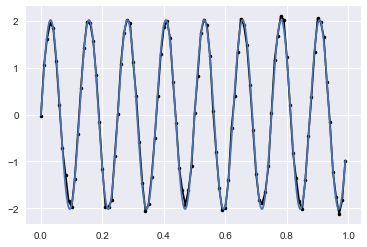

In [75]:
S = signal(T, **parameters) + np.random.randn(T.size) * noise
plt.plot(T, S, '.-k')

popt, pcov = curve_fit(signal, T, S, p0=list(parameters.values()))

for argname, variance in zip(parameters.keys(), pcov.diagonal()):
    print('{}: {:.2g}'.format(argname, np.sqrt(variance)))

Tl = np.linspace(T[0], T[-1], 10000)
plt.plot(Tl, signal(Tl, *popt))

In [77]:
def cramer_rao(model, p0, X, noise, show_plot=False):
    """Calulate inverse of the Fisher information matrix for model
    sampled on grid X with parameters. Assumes samples are not
    correlated and have equal variance noise^2.
    
    Parameters
    ----------
    model : callable
        The model function, f(x, ...).  It must take the independent
        variable as the first argument and the parameters as separate
        remaining arguments.
    X : array
        Grid where model is sampled.
    p0 : M-length sequence
        Point in parameter space where Fisher information matrix is
        evaluated.
    noise: scalar
        Squared variance of the noise in data.
    show_plot : boolean
        If True shows plot.
    
    Returns
    -------
    iI : 2d array
        Inverse of Fisher information matrix.
    """
    D = np.zeros((len(p0), X.size))
    for i, argname in enumerate(parameters.keys()):
        for k, t in enumerate(T):
            func = lambda x: signal(t, **{**parameters, **{argname: x}})
            D[i,k] = derivative(func, parameters[argname], dx=0.0001)
        
    if show_plot:
        plt.plot(X, model(X, **parameters), '--k', lw=2, label='signal')
        for Di, argname in zip(D, parameters.keys()):
            plt.plot(T, Di, '.-', label=argname)

        plt.legend(loc='best')
        plt.title('Parameter dependence on particular data point')
    
    I = np.einsum('mk,nk', D, D) / noise**2
    I_inv = np.linalg.inv(I)
    
    return I_inv

Недиагональные элементы матрицы обратной к матрице Фишера показывают корреляции между параметрами.

Посмотрим как корреляция частоты и фазы зависит от смещения оси времени. Это важно т.к. в нуле фаза фиксирована.

-16.0 -6.010000000000213
-15.0 -5.010000000000213
-14.0 -4.010000000000213
-13.0 -3.010000000000213
-12.0 -2.010000000000213
-11.0 -1.010000000000213
-10.0 -0.01000000000021295
-9.0 0.989999999999787
-8.0 1.989999999999787
-7.0 2.989999999999787
-6.0 3.989999999999787
-5.0 4.989999999999787
-4.0 5.989999999999787
-3.0 6.989999999999787
-2.0 7.990000000000009
-1.0 8.990000000000009
0.0 9.99
1.0 10.990000000000009
2.0 11.989999999999787
3.0 12.989999999999787
4.0 13.989999999999787
5.0 14.989999999999787


Text(0,0.5,'frequency - phase correlation')

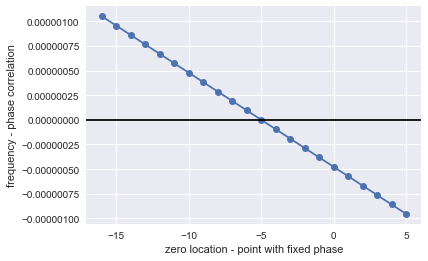

In [78]:
N = []
T0 = np.arange(-16, 6)
for t0 in T0:
    T = np.arange(t0, 10 + t0, 0.01)
    print(T[0], T[-1])
    N.append(cramer_rao(signal, parameters, T, noise)[2, 1] )
    
plt.plot(T0, N, 'o-')
plt.axhline(0, color='black')
plt.xlabel('zero location - point with fixed phase')
plt.ylabel('frequency - phase correlation')

Text(0.5,0,'time (s)')

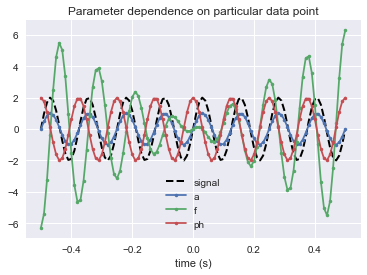

In [79]:
T = np.arange(-0.5, 0.51, 0.01)
cramer_rao(signal, parameters, T, noise, show_plot=True);
plt.xlabel('time (s)')

Text(0.5,0,'time (s)')

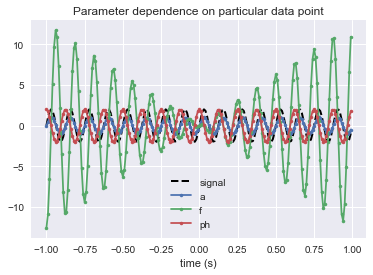

In [80]:
T = np.arange(-1., 1, 0.01)
cramer_rao(signal, parameters, T, noise, show_plot=True);
plt.xlabel('time (s)')

### * Предыдущий семинар рекап (жизненная задача с jacknife)

Итак задача, вы периодически ловите тараканов в квартире и хотите узнать, какой же возможен самый большой таракан, учитывая что все размеры тараканов распределены равномерно. Вы не слушали этот курс, и решили что самый большой таракан из пойманных - максимально возможный; насколько вы ошиблись?

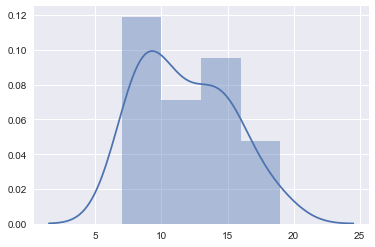

In [81]:
x = np.asarray([11,13,15,16,7,8,9,18,12,14,15,10,8,9,8,9,10,11,14,15,16,13,14,19,8,9,8,11]) # размер таракана в мм
sns.distplot(x)

#### Доказательство квадратичной точности jacknife bias estimation

Для доказательства квадратичной точности оценки смещения jacknife сделаем одно простое предположение, что матожидание нашей статистики при ограниченном размере выборки раскладывается в ряд Тейлора от размера выборки:

$$E_F \hat{\theta} = \theta + \frac{a_1(F)}{n-1} + \frac{a_2(F)}{(n - 1)^2} + \dots$$

Подставим в формулу коррекции смещения jacknife оценку смещения:

$$\hat{\theta} - \hat{bias}_{jack} = \hat{\theta} - (n - 1) ( \hat{\theta}_{(\cdot)} - \hat{\theta}) = n \hat{\theta} - (n - 1) \hat{\theta}_{(\cdot)}$$

Теперь возьмём от этого матожидание и разложим его по Тейлору:

$$E_F \left[ n \hat{\theta} - (n - 1) \hat{\theta}_{(\cdot)} \right] =  n\left(\theta + \frac{a_1(F)}{n} + \frac{a_2(F)}{n^2} + \dots\right) + $$

$$ (n-1) \left( \theta + \frac{a_1(F)}{n-1} + \frac{a_2(F)}{(n-1)^2} + \dots \right) = $$

$$ = \theta - \frac{a_2(F)}{n(n-1)} + o\left(\frac{1}{n^2}\right)$$

Как видно, jacknife избавляется от линейного члена в разложении смещения по размеру выборке.

In [82]:
# ещё раз определим джекнайф
def jackknife_resampling(data):
    n = data.shape[0]
    resamples = np.empty([n, n-1])
    for i in range(n):
        resamples[i] = np.delete(data, i) # jacknife
    return resamples


def jackknife_stats(data, statistic):
    from scipy.special import erfinv
    n = data.shape[0]
    resamples = jackknife_resampling(data)

    stat_data = statistic(data)
    jack_stat = np.apply_along_axis(statistic, 1, resamples)
    mean_jack_stat = np.mean(jack_stat, axis=0)

    bias = (n - 1) * (mean_jack_stat - stat_data)

    estimate = stat_data - bias

    return stat_data, bias, estimate

# estimate of the variance of an estimator
print('Пример на рандомной выборке оценки варианса метода', jackknife_stats(x, np.std))

Пример на рандомной выборке оценки варианса метода (3.3204683711912732, -0.08000379310881156, 3.400472164300085)


In [83]:
print('Максимальный размер таракана',jackknife_stats(x, np.max)[2], 'мм')
print('Мы бы ошиблись на', jackknife_stats(x, np.max)[2]- max(x), 'мм')
# тут же можно напомнить про максимальную параметрическую оценку

Максимальный размер таракана 19.964285714285687 мм
Мы бы ошиблись на 0.9642857142856869 мм


In [84]:
np.max(x)

19